# Week 7

This week, we consider two more basic classifiers to round out our toolbox of methods.

First, we cover **nearest-neighbor classifiers**, which make almost no assumptions on the data or the decision boundaries. They are nevertheless often quite accurate. However, they are pretty unstable and not robust to small perturbations in the data.

Second, we cover **decision tree classifiers**. Decision trees are highly *interpretable* models because they create an explicit set of single-feature-based rules for making their predictions.

Decision trees are interpretable and they train very quickly, but the set of rules is sometimes too large to be helpful and they have high variance, meaning they are very sensitive to small changes to the training data. We will explore some ways to deal with these downsides as well.

# Lecture 12: $k$-Nearest Neighbors Classifier

The $k$-nearest neighbor classifier tries to classify numerical examples into categories. Suppose we have some labeled examples $x_1, ..., x_n\in\mathbb{R}^d$ with labels $y_1, ..., y_n$. If we have a new, unlabeled point $x$, we would like to predict its class label. The idea of the $k$-nearest neighbor algorithm is that we take the $k$ labeled examples nearest to $x$ and assign the most frequent class of these nearest "neighbors" to $x$.

## The Procedure to Classify an Example $x$ with $k$-Nearest Neighbors

1. Choose a positive integer for $k$.

1. Find the distances $\left\|x-x_j\right\|$ for each $j=1,...,n$ with any norm you choose.

1. Find the points with the $k$ shortest distances from $x$ (the $k$ nearest "neighbors").

1. Assign the most frequent class among the $k$ nearest neighbors to $x$

This means we need to make only two decisions two use the $k$-nearest neighbors: we need to choose a norm and we need to choose the number of neighbors $k$ to use. Customizable parameters for a machine learning method like this $k$-nearest neighbor classifier are called **hyperparameters**. It is not generally obvious how to choose these hyperparameters and it tends to be pretty experimental. Tuning hyperparameters is a large part of machine learning.

## $k$-Nearest Neighbor Code

Let's write some code. I will use the style used by the popular machine learning library <a href="https://scikit-learn.org/stable/">scikit-learn</a>, where a classifier is written as a class in the programming sense (not to be confused with the "classes" of our classification problem) with hyperparameters as inputs. The classifier's class will have some functions that fit the model to the data and predict the class of input datapoints.

The `fit` function for the $k$-nearest neighbors will do very little but record some data. The 'predict' function will carry out steps 1-4 above.

First, we import some libraries.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

from scipy.stats import mode
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.datasets import mnist

In [3]:
# Create a class for the k-nearest neighbor classifier
class kNearestNeighborClassifier:
    # constructor to save the hyperparameter k
    def __init__(self, k = 5):
        # initialize the number of neighbors to use
        self.neighbors = k
    
    # fit the model to the training data (for kNN, there's no actual fitting involved)
    def fit(self, X, y):
            
        # record the data and labels
        self.data = X
        self.labels = y
    
    # use the classifier to predict the classifications of the testing data
    def predict(self, X):
        # initialize the predicted classes
        yPredicted = np.empty([X.shape[0],1])
        
        # loop over the datapoints in X
        for row in range(X.shape[0]):
            datapoint = X[row,]
            
            # find the distances from the datapoint to each training point using the L2 norm
            distances = np.sqrt(np.sum(((self.data - datapoint)**2), axis = 1))
            
            # find the indices of the smallest k distances
            indices = np.argsort(distances)[:self.neighbors]
            
            # find the the class labels of the nearest neighbors
            nearestClasses = self.labels[indices]
            
            # determine the predicted class by finding the mode
            yPredicted[row] = int(mode(nearestClasses)[0][0])
            
        return yPredicted

## Example: Randomly Generated Points

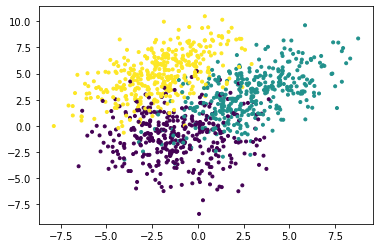

In [4]:
# number of points to generate
numberOfPoints = 500

# generate points from class 0
mean1 = np.array([-1, -1])
covariance1 = np.array([[5, 0], [0, 5]])
X1 = np.random.multivariate_normal(mean1, covariance1, numberOfPoints)

# generate points from class 1
mean2 = np.array([3, 3])
covariance2 = np.array([[5, 3], [3, 5]])
X2 = np.random.multivariate_normal(mean2, covariance2, numberOfPoints)

# generate points from class 2
mean3 = np.array([-2, 5])
covariance3 = np.array([[5, 3], [3, 5]])
X3 = np.random.multivariate_normal(mean3, covariance3, numberOfPoints)

# stack the points
X = np.vstack((X1, X2, X3))

# create a vector of the labels
Y = np.hstack((numberOfPoints * [0], numberOfPoints * [1], numberOfPoints * [2]))

# randomly choose 75% of the data to be the training set and 25% for the testing set
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.25, random_state = 1)

# plot the training set
plt.scatter(trainX[:,0], trainX[:,1], c = trainY, marker = '.')


Classification Report:

               precision    recall  f1-score   support

           0       0.77      0.80      0.79       120
           1       0.83      0.80      0.81       127
           2       0.88      0.90      0.89       128

    accuracy                           0.83       375
   macro avg       0.83      0.83      0.83       375
weighted avg       0.83      0.83      0.83       375


Confusion Matrix:



<AxesSubplot:>

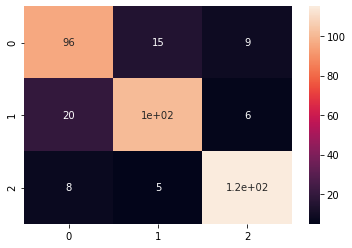

In [5]:
# fit the model to the training data
model = kNearestNeighborClassifier(k = 3)
model.fit(trainX,trainY)

# predict the labels of the test set
predictedY = model.predict(testX)

plt.scatter(trainX[:,0], trainX[:,1], c = trainY, marker = '.')

# print quality metrics
print('\nClassification Report:\n\n', classification_report(testY, predictedY))
print('\nConfusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY), annot = True)

The code above computes the neighbors in a pretty brute-force way, which is pretty slow, so it is generally best to use an existing implementation like `KNeighborsClassifier` in `scikit-learn`.


Classification Report:

               precision    recall  f1-score   support

           0       0.77      0.80      0.79       120
           1       0.83      0.80      0.81       127
           2       0.88      0.90      0.89       128

    accuracy                           0.83       375
   macro avg       0.83      0.83      0.83       375
weighted avg       0.83      0.83      0.83       375


Confusion Matrix:



<AxesSubplot:>

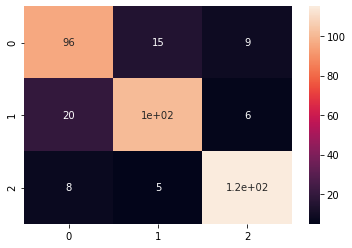

In [6]:
# fit the model to the training data
model = KNeighborsClassifier(3)
model.fit(trainX,trainY)

# predict the labels of the test set
predictedY = model.predict(testX)

plt.scatter(trainX[:,0], trainX[:,1], c = trainY, marker = '.')

# print quality metrics
print('\nClassification Report:\n\n', classification_report(testY, predictedY))
print('\nConfusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY), annot = True)


Classification Report:

               precision    recall  f1-score   support

           0       0.78      0.81      0.79       120
           1       0.82      0.78      0.80       127
           2       0.88      0.90      0.89       128

    accuracy                           0.83       375
   macro avg       0.83      0.83      0.83       375
weighted avg       0.83      0.83      0.83       375


Confusion Matrix:



<AxesSubplot:>

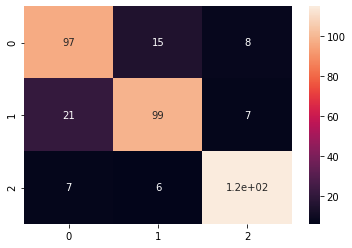

In [7]:
# fit the model to the training data
model = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')
model.fit(trainX,trainY)

# predict the labels of the test set
predictedY = model.predict(testX)

plt.scatter(trainX[:,0], trainX[:,1], c = trainY, marker = '.')

# print quality metrics
print('\nClassification Report:\n\n', classification_report(testY, predictedY))
print('\nConfusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY), annot = True)

## Classifying MNIST Handwritten Digits with $k$-NN

Dev classification accuracy 1 neighbors is 0.871
Dev classification accuracy 2 neighbors is 0.85
Dev classification accuracy 3 neighbors is 0.853
Dev classification accuracy 4 neighbors is 0.854
Dev classification accuracy 5 neighbors is 0.838
Dev classification accuracy 6 neighbors is 0.839
Dev classification accuracy 7 neighbors is 0.83
Dev classification accuracy 8 neighbors is 0.836
Dev classification accuracy 9 neighbors is 0.821
Dev classification accuracy 10 neighbors is 0.819

The best dev accuracy 0.871 occured with 1 neghbors

Test Classification Report for 0.871 neighbors:

               precision    recall  f1-score   support

           0       0.91      0.97      0.94        97
           1       0.88      1.00      0.94       106
           2       0.94      0.89      0.91       108
           3       0.92      0.83      0.87       120
           4       0.85      0.83      0.84        87
           5       0.72      0.73      0.73        75
           6       0.92     

<AxesSubplot:>

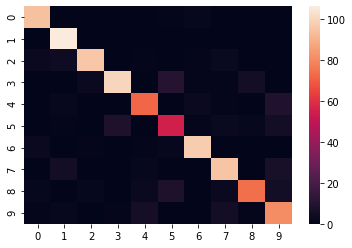

In [8]:
(trainX, trainY), (testX, testY) = mnist.load_data()

trainX = trainX.reshape(trainX.shape[0], trainX.shape[1] * trainX.shape[2]).astype('float')/255.0
testX = testX.reshape(testX.shape[0], testX.shape[1] * testX.shape[2]).astype('float')/255.0

devX, testX, devY, testY = train_test_split(testX, testY, test_size = 0.5)

trainX = trainX[:1000]
devX = devX[:1000]
testX = testX[:1000]
trainY = trainY[:1000]
devY = devY[:1000]
testY = testY[:1000]

bestAccuracy = [0, 0]

for k in range(1, 11):
    # build the knn classifier
    model = KNeighborsClassifier(k)

    # fit the knn classifier to the training data
    model.fit(trainX, trainY)

    # predict the labels of the test set
    predictedY = model.predict(devX)
    
    # compute the accuracy
    acc = accuracy_score(devY, predictedY)
    
    # print quality metrics
    print('Dev classification accuracy', k, 'neighbors is', acc)
    
    # save the hyperparameter k if better than found before
    if acc > bestAccuracy[0]:
        bestAccuracy = [acc, k]
        
print('\nThe best dev accuracy', bestAccuracy[0], 'occured with', bestAccuracy[1], 'neghbors')
        
# build the knn classifier
model = KNeighborsClassifier(bestAccuracy[1])

# fit the knn classifier to the training data
model.fit(trainX, trainY)

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nTest Classification Report for', bestAccuracy[0], 'neighbors:\n\n', classification_report(testY, predictedY))
print('\nTest Confusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY))

Mean CV accuracy for 1 neighbors is 0.9393
Mean CV accuracy for 2 neighbors is 0.9307000000000001
Mean CV accuracy for 3 neighbors is 0.9395000000000001
Mean CV accuracy for 4 neighbors is 0.9405000000000001
Mean CV accuracy for 5 neighbors is 0.9377000000000001
Mean CV accuracy for 6 neighbors is 0.9362999999999999
Mean CV accuracy for 7 neighbors is 0.9359999999999999
Mean CV accuracy for 8 neighbors is 0.9343999999999999
Mean CV accuracy for 9 neighbors is 0.9345000000000001
Mean CV accuracy for 10 neighbors is 0.9341000000000002

The best dev accuracy 0.9405000000000001 occured with 4 neghbors

Test Classification Report for 0.9405000000000001 neighbors:

               precision    recall  f1-score   support

           0       0.94      0.99      0.96       980
           1       0.91      0.99      0.95      1135
           2       0.97      0.92      0.95      1032
           3       0.92      0.95      0.94      1010
           4       0.96      0.95      0.95       982
      

<AxesSubplot:>

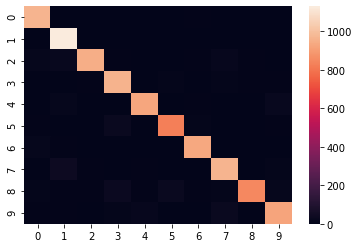

In [9]:
(trainX, trainY), (testX, testY) = mnist.load_data()

trainX = trainX.reshape(trainX.shape[0], trainX.shape[1] * trainX.shape[2]).astype('float')/255.0
testX = testX.reshape(testX.shape[0], testX.shape[1] * testX.shape[2]).astype('float')/255.0

trainX = trainX[:10000]
testX = testX[:10000]
trainY = trainY[:10000]
testY = testY[:10000]

bestAccuracy = [0, 0]

for k in range(1, 11):
    # build the knn classifier
    model = KNeighborsClassifier(k)

    # fit the knn classifier to the training data
    model.fit(trainX, trainY)
    
    mean_cv_scores = np.mean(cross_val_score(model, trainX, trainY, cv = 5))

    # print quality metrics
    print('Mean CV accuracy for', k, 'neighbors is', mean_cv_scores)
    
    # save the hyperparameter k if better than found before
    if mean_cv_scores > bestAccuracy[0]:
        bestAccuracy = [mean_cv_scores, k]
        
print('\nThe best dev accuracy', bestAccuracy[0], 'occured with', bestAccuracy[1], 'neghbors')
        
# build the knn classifier
model = KNeighborsClassifier(bestAccuracy[1])

# fit the knn classifier to the training data
model.fit(trainX, trainY)

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nTest Classification Report for', bestAccuracy[0], 'neighbors:\n\n', classification_report(testY, predictedY))
print('\nTest Confusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY))

This is quite good accuracy at 94%!

# Lecture 13 - Implementing Decision Trees

We will use the following (slightly modified) tutorial from https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html.

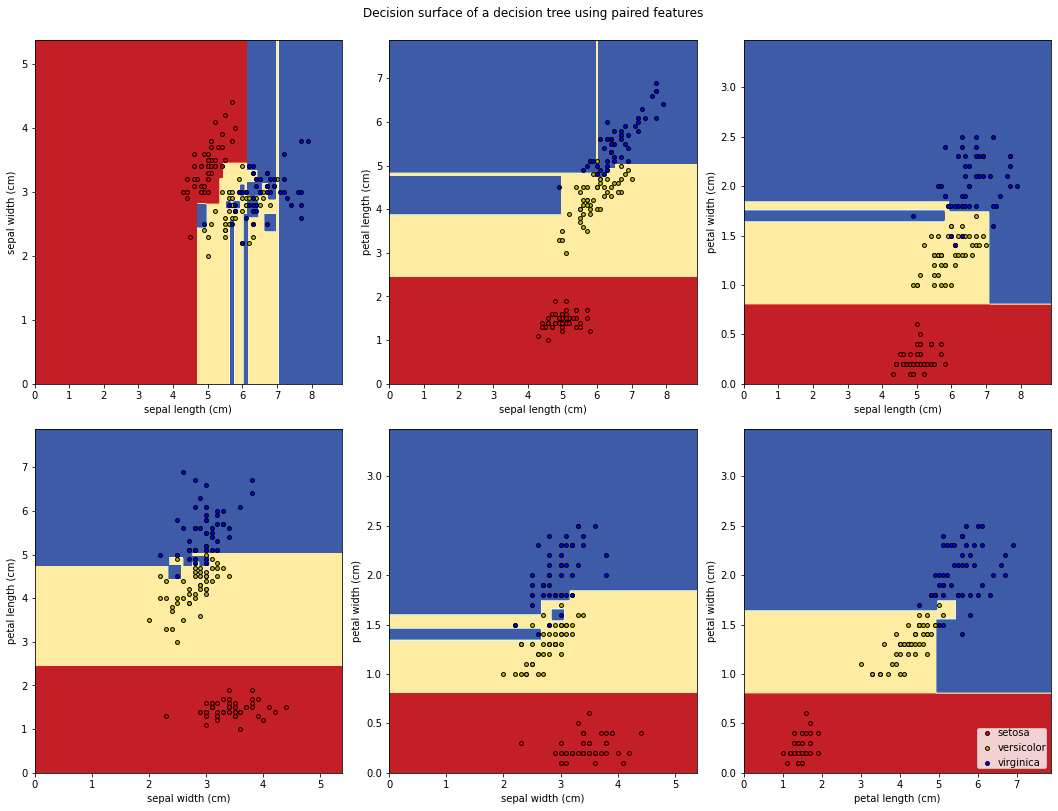

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# hyperparameters
n_classes = 3
plot_colors = 'ryb'
plot_step = 0.02

# Load the iris dataset
iris = load_iris()

plt.figure(figsize=(16,12))

# run the model for each pair of features
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # fit the classifier
    clf = DecisionTreeClassifier().fit(X, y)

    # plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    # predict the testing data on a tight mesh of points in space and color-code them
    x_min, x_max = 0, X[:, 0].max() + 1
    y_min, y_max = 0, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

    plt.tight_layout(h_pad=1, w_pad=1, pad=5)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle('Decision surface of a decision tree using paired features')
plt.legend(loc='lower right', borderpad=0, handletextpad=0)

[Text(446.4, 597.96, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(377.7230769230769, 489.24, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(515.0769230769231, 489.24, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(274.7076923076923, 380.52000000000004, 'petal length (cm) <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(137.35384615384615, 271.8, 'petal width (cm) <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor'),
 Text(68.67692307692307, 163.07999999999998, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = versicolor'),
 Text(206.03076923076924, 163.07999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(412.0615384615385, 271.8, 'petal width (cm) <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(343.38461538461536, 163.0

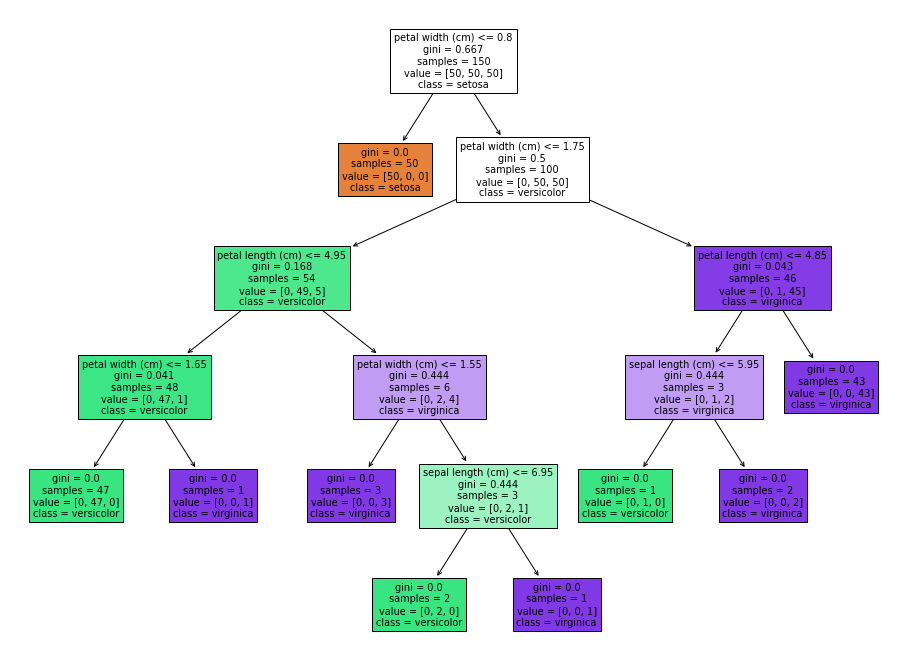

In [2]:
# plot a tree fit to the whole dataset
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plt.figure(figsize=(16,12))
plot_tree(clf, filled=True, feature_names = iris.feature_names, class_names = iris.target_names)